In [1]:
%matplotlib inline
from fonctions_escher import *

Commençons par un poisson tout seul: la nageoire n'est pas complète, mais ce n'est pas grave, elle sera formée par les poissons autour.

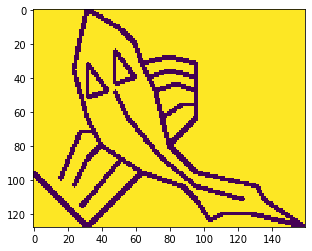

In [2]:
montre(poisson, 128)

Nous pouvons créer les mêmes images intermédiaires, pour nous assurer que les poissons s'imbriquent (Figure 5 dans la [référence](https://eprints.soton.ac.uk/257577/1/funcgeo2.pdf)):

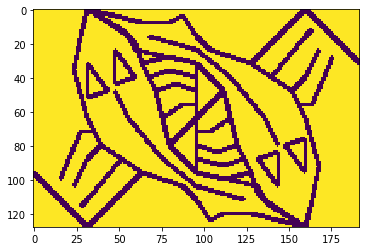

In [3]:
montre(union_images(poisson, tour_90_a_gauche(tour_90_a_gauche(poisson))), 128)

Nous pouvons aussi créer la figure 6 de la [référence](https://eprints.soton.ac.uk/257577/1/funcgeo2.pdf): remarque que `tour_45_a_gauche` contient aussi une homothétie mais inclure cela dans le nom l'aurait rendu encore plus long.

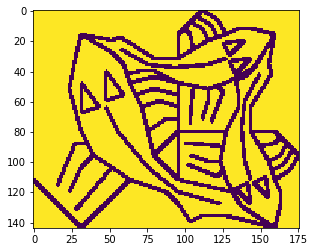

In [4]:
poisson2 = symetrie_axe_vertical(tour_45_a_gauche(poisson))
poisson3 = tour_90_a_gauche(tour_90_a_gauche(tour_90_a_gauche(poisson2)))
t = union_images(poisson, union_images(poisson2, poisson3))
montre(t, 128)

Le centre de l'image d'Escher est obtenu en assemblant 4 poissons identiques à une rotation près (figure 7 de la [référence](https://eprints.soton.ac.uk/257577/1/funcgeo2.pdf)):

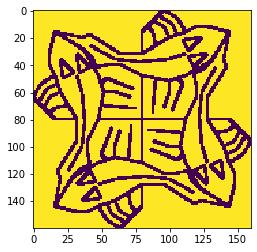

In [5]:
u = union_images(union_images(poisson2, tour_90_a_gauche(poisson2)),
                 union_images(tour_90_a_gauche(tour_90_a_gauche(poisson2)),
                              tour_90_a_gauche(tour_90_a_gauche(tour_90_a_gauche(poisson2)))))
montre(u, 128)

Cette image `u` peut à son tour être assemblée en carré (figure 8 de la [référence](https://eprints.soton.ac.uk/257577/1/funcgeo2.pdf)):

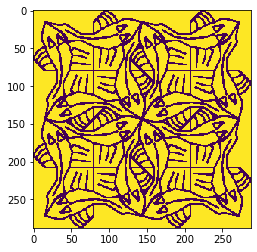

In [6]:
def quartet(p, q, r, s):
    return au_dessus(a_cote(p, q), a_cote(r, s))
montre(quartet(u, u, u, u), 256)

Pour réaliser `v`, la figure 9 de la [référence](https://eprints.soton.ac.uk/257577/1/funcgeo2.pdf), il faut prendre 4 fois l'image `t` et la faire tourner sur elle même (semblable à `u`):

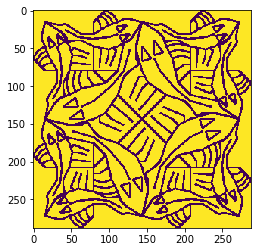

In [7]:
def cycle(p):
    q = tour_90_a_gauche(p)
    r = tour_90_a_gauche(q)
    s = tour_90_a_gauche(r)
    return quartet(p, s, q, r)
v = cycle(tour_90_a_gauche(t))
montre(v, 256)

Cette image `v` peut aussi être utilisée pour paver le plan (figure 10 de la [référence](https://eprints.soton.ac.uk/257577/1/funcgeo2.pdf)).  Puisque il y a plus de poissons à l'intérieur de l'image, il faut augmenter la résolution:

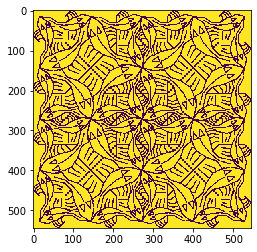

In [8]:
montre(quartet(v, v, v, v), 512)

Les côtés de l'image sont construites en utilisant `t` et les côtés de l'image elle-même.  Par exemple, `cote1` et `cote2` sont (figures 11 et 12 dans la [référence](https://eprints.soton.ac.uk/257577/1/funcgeo2.pdf)):

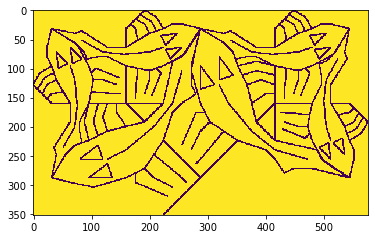

In [9]:
cote1 = quartet(blanc, blanc, tour_90_a_gauche(t), t)
montre(cote1, 512)

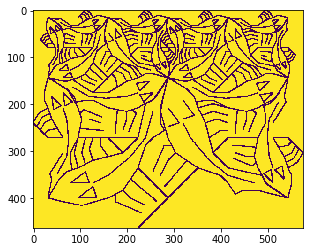

In [10]:
cote2 = quartet(cote1, cote1, tour_90_a_gauche(t), t)
montre(cote2, 512)

On peut généraliser cette idée d'utiliser le côté pour définir le côté suivant avec une fonction récursive:

In [11]:
def cote(n):
    if n <= 1:
        # la récursion est finie, nous n'avons pas besoin de savoir comment dessiner un autre côté pour dessiner cote1
        return quartet(blanc, blanc, tour_90_a_gauche(t), t)
    else:
        # la récursion continue: pour dessiner cote10, nous avons besoin de cote9 qui a besoin de cote7 et ainsi de suite
        return quartet(cote(n - 1), cote(n - 1), tour_90_a_gauche(t), t)

Ensuite, c'est le tour des coins.  Comme pour les côtés, définissons d'abord deux coins spécifiques puis nous généraliserons après (figures 13 et 14 dans la [référence](https://eprints.soton.ac.uk/257577/1/funcgeo2.pdf)).  L'échelle des images est différente parce que contrairement aux figures dans la [référence](https://eprints.soton.ac.uk/257577/1/funcgeo2.pdf), nos images sont toujours redimensionnées pour remplir entièrement leur cadre:

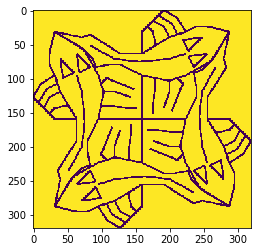

In [12]:
coin1 = quartet(blanc, blanc, blanc, u)
montre(coin1, 512)

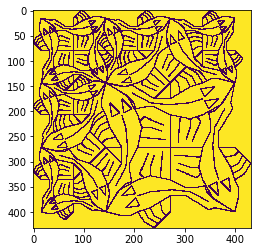

In [13]:
coin2 = quartet(coin1, cote(1), tour_90_a_gauche(cote(1)), u)
montre(coin2, 512)

In [14]:
def coin(n):
    if n <= 1:
        return quartet(blanc, blanc, blanc, u)
    else:
        return quartet(coin(n - 1), cote(n - 1), tour_90_a_gauche(cote(n - 1)), u)

Pour faire l'image d'Escher, nous assemblons 9 parties (les 4 coins `p`, `r`, `v` et `x`; 4 côtés `q`, `s`, `u` et `w`; et le centre `t`):

In [15]:
def nonet(p, q, r,
          s, t, u,
          v, w, x):
    # les paramètres m et n permettent de restaurer l'équilibre pour que toutes
    # les parties soient utilisées à la même dimension.
    return au_dessus(
        a_cote(p, a_cote(q, r), m=1, n=2),
        au_dessus(
              a_cote(s, a_cote(t, u), m=1, n=2),
              a_cote(v, a_cote(w, x), m=1, n=2)),
        m=1, n=2)

La fonction `nonet` qui assemble 9 parties d'image en une seule image est utilisée pour créer l'image d'Escher au niveau de détail voulu:

In [16]:
def poissons_escher(n):
    coin_0 = coin(n)
    cote_0 = cote(n)
    coin_90 = tour_90_a_gauche(coin_0)
    cote_90 = tour_90_a_gauche(cote_0)
    coin_180 = tour_90_a_gauche(coin_90)
    cote_180 = tour_90_a_gauche(cote_90)
    return nonet(coin_0,  cote_0,   tour_90_a_gauche(coin_180),
                 cote_90, u,        tour_90_a_gauche(cote_180),
                 coin_90, cote_180, coin_180)

Par exemple pour 2:

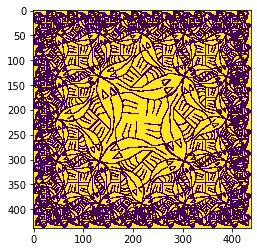

In [17]:
montre(poissons_escher(2), 512)

L'affichage à l'intérieur de cette page a une taille limitée qui ne permet pas vraiment d'apprécier les détails de l'image.  Sauvons les à une résolution plus élevée et visionnons les séparèment:

In [18]:
sauve('poissons_escher_2.png', poissons_escher(2), 2048)
sauve('poissons_escher_3.png', poissons_escher(3), 4096)
sauve('poissons_escher_4.png', poissons_escher(4), 4096)